Assignment 8 

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import array as arr

(<AxesSubplot:>,
 (-0.5, 511.5, 511.5, -0.5))

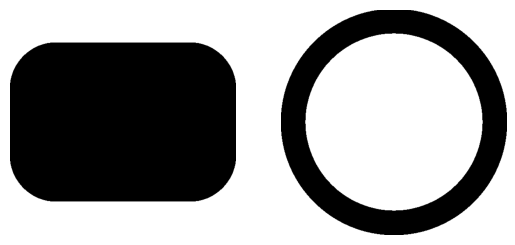

In [3]:
#read img
imgA = cv.imread('rectangle.png')
imgB = cv.imread('circle.png')

grayA = cv.cvtColor(imgA, cv.COLOR_RGB2GRAY)
grayB = cv.cvtColor(imgB, cv.COLOR_RGB2GRAY)

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

plt.subplot(1,2,1), plt.imshow(grayA, cmap='gray'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(grayB, cmap='gray'), plt.axis('off')

1. Develop and apply the compass filter to an image and discuss the results.

In [16]:
def compass(img):
    Hs0 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
    Hs1 = np.array([[-2,-1, 0],
                    [-1, 0, 1],
                    [ 0, 1, 2]])
    Hs2 = np.array([[-1,-2,-1],
                    [ 0, 0, 0],
                    [ 1, 2, 1]])
    Hs3 = np.array([[ 0,-1,-2],
                    [ 1, 0,-1],
                    [ 2, 1, 0]])
    Hs = np.array([Hs0, Hs1, Hs2, Hs3])
    s = Hs.shape
    new = img
    (x,y) = img.shape
    padding = np.pad(img, [(1, 1),(1, 1)], mode='constant')
    for i in range(x):
        for j in range(y):
            mul = np.empty(4, dtype=object)
            img_cov = padding[i:i+3, j:j+3]
            img_cov = [[img_cov]*4]
            mul = np.multiply(img_cov, Hs)
            mul = mul.reshape(s)
            sum = np.sum(mul, axis=1)
            sum = np.sum(sum, axis=1)
            sum = np.abs(sum)
            new[i,j] = np.amax(sum)
    new = new/6
    output = np.clip(new, a_min = 0, a_max = 255)
    return output

(<AxesSubplot:>,
 (-0.5, 511.5, 511.5, -0.5))

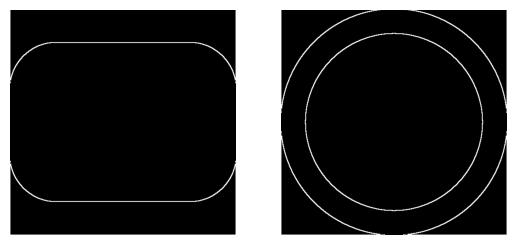

In [17]:
grayA = cv.cvtColor(imgA, cv.COLOR_RGB2GRAY)
grayB = cv.cvtColor(imgB, cv.COLOR_RGB2GRAY)

plt.subplot(1,2,1), plt.imshow(compass(grayA), cmap='gray'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(compass(grayB), cmap='gray'), plt.axis('off')

2. Study Canny Operator and apply to an image. Also explain how to apply it step by step.

In [5]:
# in canny.py
# cannot run in notebook

# img = cv.imread('kazuha.jpg')
# gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
# edges_canny = cv.Canny(gray,100,200)
# cv.imshow('original', img)
# cv.imshow('canny', edges_canny)

# cv.waitkey(0)
# cv.destroyAllWindows()

3. Study Hough Transform and show how to use it step by step.

4. Apply edge sharpening with the Laplace filter to an image

In [12]:
def EdgeSharpening(img, w):

    #Laplace filter
    L = np.array([[ 0, 1, 0],
                  [ 1, 4, 1],
                  [ 0, 1, 0]])
    new = img
    (x,y) = img.shape
    padding = np.pad(img, [(1, 1),(1, 1)], mode='constant')
    for i in range(x):
        for j in range(y):
            sum = np.int8(0)
            img_cov = padding[i:i+3, j:j+3]
            mul = np.multiply(img_cov, L)
            sum = np.sum(mul)
            new[i,j] = sum
    new = img - w*new
    output = np.clip(new, a_min = 0, a_max = 255)
    return output

(<AxesSubplot:title={'center':'Edge Sharpeninng'}>,
 (-0.5, 511.5, 511.5, -0.5),
 Text(0.5, 1.0, 'Edge Sharpeninng'))

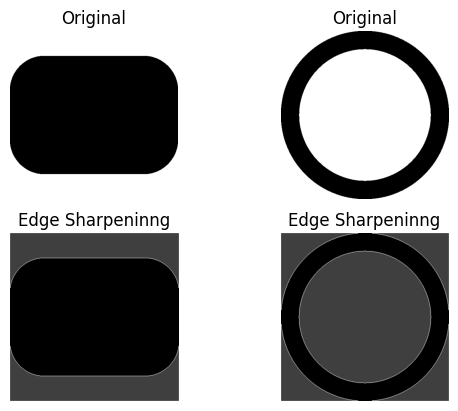

In [17]:
grayA = cv.cvtColor(imgA, cv.COLOR_RGB2GRAY)
grayB = cv.cvtColor(imgB, cv.COLOR_RGB2GRAY)

plt.subplot(2,2,1), plt.imshow(grayA, cmap='gray'), plt.axis('off'), plt.title('Original')
plt.subplot(2,2,2), plt.imshow(grayB, cmap='gray'), plt.axis('off'), plt.title('Original')
plt.subplot(2,2,3), plt.imshow(EdgeSharpening(grayA, 200), cmap='gray'), plt.axis('off'), plt.title('Edge Sharpeninng')
plt.subplot(2,2,4), plt.imshow(EdgeSharpening(grayB, 200), cmap='gray'), plt.axis('off'), plt.title('Edge Sharpeninng')

5. Apply unsharp mask technique to sharpening an image.

In [35]:
def Unsharp(img, w):

    # Smoothing filter
    fil = np.array([[ 1, 1, 1],
                    [ 1, 1, 1],
                    [ 1, 1, 1]])
    new = img
    (x,y) = img.shape
    padding = np.pad(img, [(1, 1),(1, 1)], mode='constant')

    # Smoothing -> mask
    for i in range(x):
        for j in range(y):
            sum = np.int8(0)
            img_cov = padding[i:i+3, j:j+3]
            mul = np.multiply(img_cov, fil)
            sum = np.sum(mul)
            new[i,j] = sum
    new = new/np.sum(fil)

    # Add weight to mask
    new = img + new*w
    output = np.clip(new, a_min = 0, a_max = 255)
    return output

(<AxesSubplot:title={'center':'Unsharp mask'}>,
 (-0.5, 1099.5, 617.5, -0.5),
 Text(0.5, 1.0, 'Unsharp mask'))

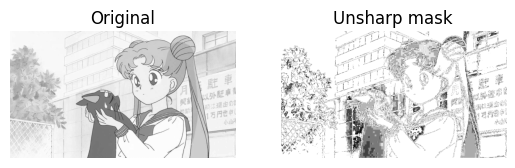

In [39]:
img = cv.imread('SailorMoon.jpg')
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

plt.subplot(1,2,1), plt.imshow(gray, cmap='gray'), plt.axis('off'), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(Unsharp(gray, 20), cmap='gray'), plt.axis('off'), plt.title('Unsharp mask')